In [219]:
import numpy as np
import pandas as pd
#import matplotlib as plt - error dėl atributo show?
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
#pd.set_option('max_column', 100)
#import lxml
#import html5lib
#import sqlalchemy

In [220]:
# įkeliu dataset'ą kurį radau Kaggle:"Music & Mental Health Survey Results"
# https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results

apklausa = pd.read_csv('survey_results.csv')
apklausa.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [221]:
#pasitikrinu kokie stulpelių pavadinimai, objektų tipai?
apklausa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [222]:
#vidutinės reikšmės
apklausa.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [223]:
#Populiariausias muzikinis žanras?
apklausa["Fav genre"].value_counts()

Rock                188
Pop                 114
Metal                88
Classical            53
Video game music     44
EDM                  37
R&B                  35
Hip hop              35
Folk                 30
K pop                26
Country              25
Rap                  22
Jazz                 20
Lofi                 10
Gospel                6
Latin                 3
Name: Fav genre, dtype: int64

In [224]:
#Kokio amžiaus, kiek žmonių dalyvavo apklausoje?
apklausa["Age"].value_counts()

18.0    85
19.0    61
17.0    59
21.0    52
16.0    44
        ..
39.0     1
73.0     1
72.0     1
69.0     1
89.0     1
Name: Age, Length: 61, dtype: int64

In [225]:
#noriu suapvalinti amžių, kad būtų be kablelio. keičiu iš float tipo į int?
display(apklausa.dtypes)
#apklausa['Age'] = apklausa['Age'].astype(int)
#apklausa.head()
#apklausa['Age'] = apklausa['Age'].apply(np.int64)- gaunu klaidą: " cannot convert float NaN to integer"
#display(apklausa.dtypes)

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


In [226]:
#kadangi yra NaN reikšmių reikia pirmiau jas pašalinti, kad galėčiau konvertuoti?
apklausa.isna().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [227]:
#Pašalinu NaN reikšmes iš dataframe
apklausa.dropna(inplace=True)
apklausa.head(10)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
7,8/27/2022 22:18:59,21.0,Spotify,1.0,Yes,No,No,K pop,Yes,Yes,...,Sometimes,Rarely,Never,Rarely,5.0,3.0,5.0,3.0,Improve,I understand.
8,8/27/2022 22:33:05,19.0,Spotify,6.0,Yes,No,No,Rock,No,No,...,Never,Never,Very frequently,Never,2.0,0.0,0.0,0.0,Improve,I understand.
9,8/27/2022 22:44:03,18.0,I do not use a streaming service.,1.0,Yes,No,No,R&B,Yes,Yes,...,Sometimes,Rarely,Sometimes,Sometimes,2.0,2.0,5.0,1.0,Improve,I understand.
11,8/27/2022 23:00:32,19.0,YouTube Music,8.0,Yes,No,No,EDM,Yes,No,...,Rarely,Sometimes,Rarely,Rarely,1.0,0.0,0.0,1.0,Improve,I understand.
13,8/27/2022 23:12:03,19.0,Spotify,2.0,Yes,No,No,Country,Yes,No,...,Never,Very frequently,Never,Never,2.0,1.0,2.0,0.0,Improve,I understand.


In [228]:
#ištrinu 'BPM' stulpelį, nes ten daug NAN reikšmių(107). Ir leidimų stulpelį, nes nereikalingas
apklausa.drop(columns=['BPM', 'Permissions'], inplace=True)
apklausa.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve


In [229]:
#noriu suapvalinti amžių, kad būtų be kablelio. keičiu iš float tipo į int?
display(apklausa.dtypes)
apklausa['Age'] = apklausa['Age'].astype(int)
#Patikrinu ar pasikeitė tipas?
display(apklausa.dtypes)

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object
Frequency [Rock]                 object


Timestamp                        object
Age                               int32
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object
Frequency [Rock]                 object


In [230]:
apklausa.head(10)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,8/27/2022 21:28:18,18,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,8/27/2022 21:40:40,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,8/27/2022 21:54:47,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
5,8/27/2022 21:56:50,18,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
6,8/27/2022 22:00:29,18,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve
7,8/27/2022 22:18:59,21,Spotify,1.0,Yes,No,No,K pop,Yes,Yes,...,Sometimes,Sometimes,Rarely,Never,Rarely,5.0,3.0,5.0,3.0,Improve
8,8/27/2022 22:33:05,19,Spotify,6.0,Yes,No,No,Rock,No,No,...,Never,Never,Never,Very frequently,Never,2.0,0.0,0.0,0.0,Improve
9,8/27/2022 22:44:03,18,I do not use a streaming service.,1.0,Yes,No,No,R&B,Yes,Yes,...,Sometimes,Sometimes,Rarely,Sometimes,Sometimes,2.0,2.0,5.0,1.0,Improve
11,8/27/2022 23:00:32,19,YouTube Music,8.0,Yes,No,No,EDM,Yes,No,...,Rarely,Rarely,Sometimes,Rarely,Rarely,1.0,0.0,0.0,1.0,Improve
13,8/27/2022 23:12:03,19,Spotify,2.0,Yes,No,No,Country,Yes,No,...,Rarely,Never,Very frequently,Never,Never,2.0,1.0,2.0,0.0,Improve


In [231]:
#rūšiavimas pagal norimą stulpelį, nuo didžiausio. arba pagal kelis kriterijus
#apklausa.sort_values(by="Age", ascending=False).head()
#apklausa.sort_values(by=["Age", "Hours per day"], ascending=[True, False]).head()


In [232]:
#vidutinis apklausų atlikėjų amžius?
apklausa["Age"].mean()

24.792207792207794

In [233]:
# kiek vidutiniškai skiria muzikai laiko sudėjus visus rezultatus?
apklausa["Hours per day"].mean()

3.702435064935065

In [237]:
#ar yra nulinių reikšmių?
apklausa.isnull().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD           

In [242]:
# populiariausia "vieta" kur klausoma muzika
apklausa['Primary streaming service'].value_counts()

Spotify                              396
YouTube Music                         73
I do not use a streaming service.     56
Apple Music                           42
Other streaming service               40
Pandora                                9
Name: Primary streaming service, dtype: int64

In [236]:
#Kiek yra nepasikartojančių reikšmių?
apklausa.nunique()

Timestamp                       616
Age                              59
Primary streaming service         6
Hours per day                    23
While working                     2
Instrumentalist                   2
Composer                          2
Fav genre                        16
Exploratory                       2
Foreign languages                 2
Frequency [Classical]             4
Frequency [Country]               4
Frequency [EDM]                   4
Frequency [Folk]                  4
Frequency [Gospel]                4
Frequency [Hip hop]               4
Frequency [Jazz]                  4
Frequency [K pop]                 4
Frequency [Latin]                 4
Frequency [Lofi]                  4
Frequency [Metal]                 4
Frequency [Pop]                   4
Frequency [R&B]                   4
Frequency [Rap]                   4
Frequency [Rock]                  4
Frequency [Video game music]      4
Anxiety                          12
Depression                  

In [153]:
#ar nėra pasikartojančių ?
apklausa.duplicated().sum()

0

In [154]:
#persivadinu norimus stulpelius kuriuos naudosiu.
apklausa.rename(
    columns={"Timestamp": "Date",
    "Fav genre": "Genre",
    "Primary streaming service": "Where listening"},
    inplace=True,)

In [155]:
apklausa

,Date,Age,Where listening,Hours per day,While working,Instrumentalist,Composer,Genre,Exploratory,Foreign languages,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,8/27/2022 21:28:18,18,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,8/27/2022 21:40:40,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,8/27/2022 21:54:47,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
5,8/27/2022 21:56:50,18,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
6,8/27/2022 22:00:29,18,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve
732,11/1/2022 22:26:42,18,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve
733,11/3/2022 23:24:38,19,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve
734,11/4/2022 17:31:47,19,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve


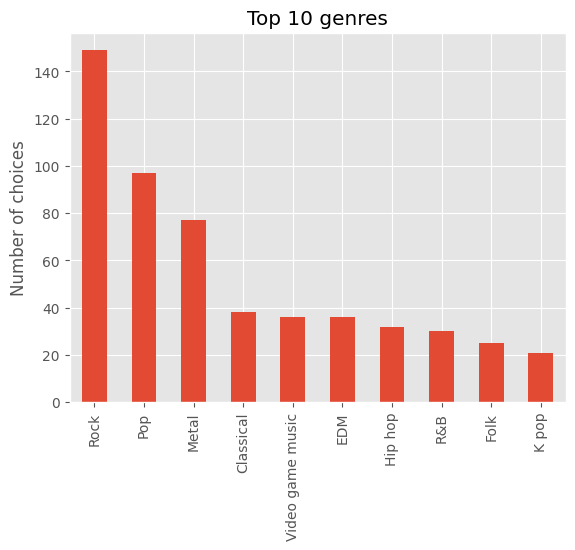

In [156]:
#top 10 populiariausių klausomų žanrų?
ax = apklausa['Genre'].value_counts().head(10).plot(kind='bar', title='Top 10 genres')
#ax.set_xlabel('Genre')
ax.set_ylabel('Number of choices')

plt.show()

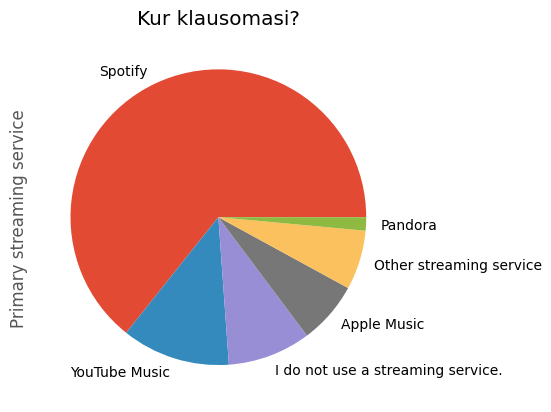

In [244]:
# populiariausia "vieta" kur klausoma muzika
apklausa['Primary streaming service'].value_counts().plot(kind='pie', title='Kur klausomasi?')
plt.show()

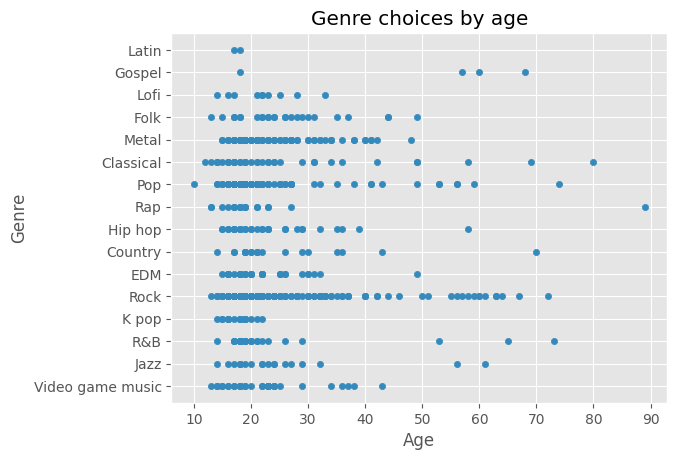

In [158]:
#Amžiaus pasiskirstymas pagal žanrus? Kokio amžiaus, ką klauso?
ax = apklausa.plot(kind='scatter',
                   x='Age',
                   y='Genre',
                   title='Genre choices by age')

plt.show()

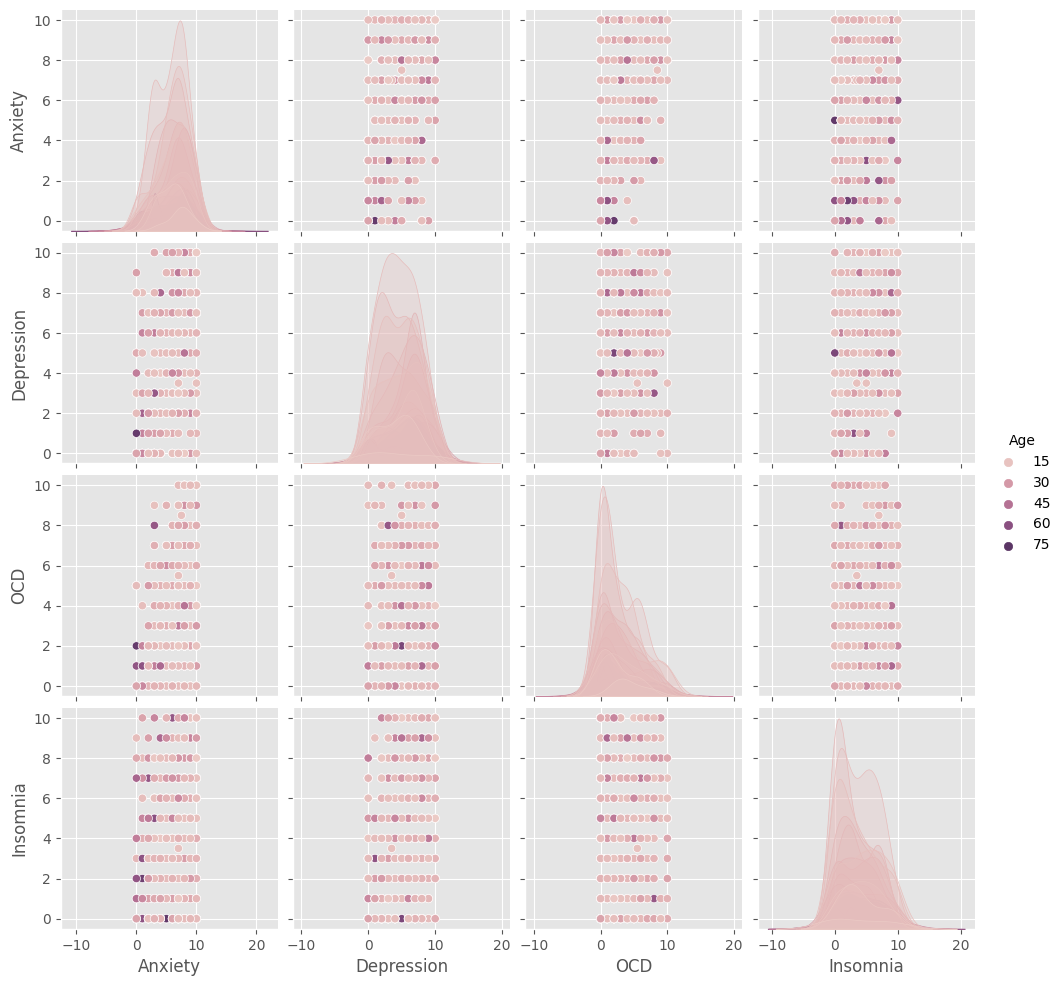

In [159]:
#psihinės sveikatos palyginimas pagal kelis kriterijus
sns.pairplot(apklausa, vars=['Anxiety', 'Depression', 'OCD' , 'Insomnia'],
             hue='Age'
             )

plt.show()

In [160]:
koreliacija = apklausa.corr()

C:\Users\aurel\AppData\Local\Temp\ipykernel_13756\3947254555.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  koreliacija = apklausa.corr()


In [161]:
koreliacija

,Age,Hours per day,Anxiety,Depression,Insomnia,OCD
Age,1.000000,-0.044917,-0.193781,-0.087390,0.007083,-0.140464
Hours per day,-0.044917,1.000000,0.036945,0.085559,0.119036,0.108197
Anxiety,-0.193781,0.036945,1.000000,0.527950,0.275013,0.339262
Depression,-0.087390,0.085559,0.527950,1.000000,0.372675,0.158990
Insomnia,0.007083,0.119036,0.275013,0.372675,1.000000,0.198866
OCD,-0.140464,0.108197,0.339262,0.158990,0.198866,1.000000


<Axes: >

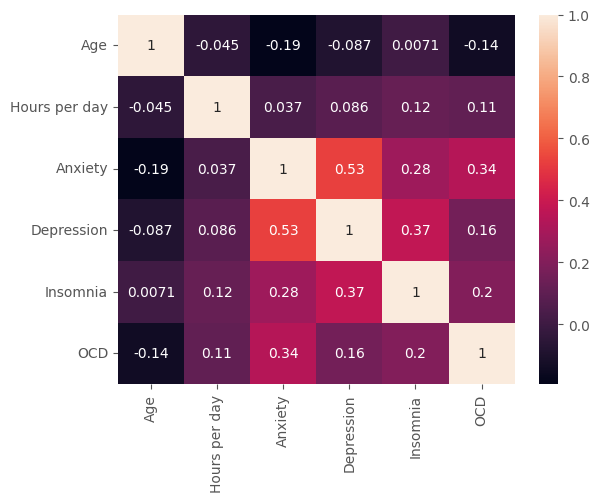

In [162]:
sns.heatmap(koreliacija, annot=True)

In [ ]:
# kokio žanro klausomasi ilgiausiai, pagal amžių?